Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [470]:
NAME = "Aarushi Jain"
COLLABORATORS = "Pooja Menon"

In [471]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [472]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [473]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [474]:
#drop values where customerID and churn are missing
df.dropna(subset=['customerID', 'Churn'])

#fill missing values with mode
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

#fill missing values with mean
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numeric_columns:
    if col == 'TotalCharges':
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].mean(), inplace=True)

df.isnull().sum()
df.head()

/tmp/ipykernel_2376857/3810522684.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipykernel_2376857/3810522684.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [475]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [476]:
#converting data types

#convert categorical to category
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaperlessBilling', 'PaymentMethod', 'Churn']

df[categorical_columns] = df[categorical_columns].astype('category')
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
df.dtypes
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [477]:
#convert yes/no to 1/0
yes_no_columns = [col for col in df.select_dtypes(include='category').columns 
                  if set(df[col].unique()) <= {'Yes', 'No'}]
yes_no_columns

['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

In [478]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[yes_no_columns] = df[yes_no_columns].replace({'Yes': 1, 'No': 0}).astype(int)
df.head()

/tmp/ipykernel_2376857/1516045337.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yes_no_columns] = df[yes_no_columns].replace({'Yes': 1, 'No': 0}).astype(int)
/tmp/ipykernel_2376857/1516045337.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[yes_no_columns] = df[yes_no_columns].replace({'Yes': 1, 'No': 0}).astype(int)
/tmp/ipykernel_2376857/1516045337.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fals

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
# Model Type: Random Forest Classifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.fillna(df.median(), inplace=True)
if df["Churn"].isnull().sum() > 0:
    df = df.dropna(subset=["Churn"])
    
X = df.drop('Churn', axis=1)  
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importance_df)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()
plt.show()

In [480]:
# Model Type: Logistic Regression 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df_logistic = df

binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df_logistic[binary_cols] = df_logistic[binary_cols].astype(int)

bool_cols = [col for col in df_logistic.columns if df_logistic[col].dtype == 'bool']
df_logistic[bool_cols] = df_logistic[bool_cols].astype(int)

category_cols = [col for col in df_logistic.columns if df_logistic[col].dtype.name == 'category']
df_logistic = pd.get_dummies(df_logistic, columns=category_cols, drop_first=True)

df_logistic.drop(['customerID'], axis=1, inplace=True)

print(df.dtypes)
print(df.isnull().sum())

X = df_logistic.drop('Churn', axis=1) 
y = df_logistic['Churn']          

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Mo

/usr/lib/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [481]:
import sqlite3

conn = sqlite3.connect('telco_customer_data.db')
cursor = conn.cursor()

sql_table = ("""
CREATE TABLE IF NOT EXISTS telco_customer_data (
    customerID TEXT PRIMARY KEY,
    gender TEXT NOT NULL,
    SeniorCitizen INTEGER NOT NULL,
    Partner INTEGER NOT NULL,
    Dependents INTEGER NOT NULL,
    tenure INTEGER NOT NULL,
    PhoneService INTEGER NOT NULL,
    MultipleLines TEXT NOT NULL,
    InternetService TEXT NOT NULL,
    OnlineSecurity TEXT NOT NULL,
    OnlineBackup TEXT NOT NULL,
    DeviceProtection TEXT NOT NULL,
    TechSupport TEXT NOT NULL,
    StreamingTV TEXT NOT NULL,
    StreamingMovies TEXT NOT NULL,
    Contract TEXT NOT NULL,
    PaperlessBilling INTEGER NOT NULL,
    PaymentMethod TEXT NOT NULL,
    MonthlyCharges REAL NOT NULL,
    TotalCharges REAL NOT NULL,
    Churn INTEGER
);
""")

cursor.execute(sql_table)
conn.commit()

In [482]:
cursor.execute("PRAGMA table_info(telco_customer_data);")
cursor.fetchall()

[(0, 'customerID', 'TEXT', 0, None, 1),
 (1, 'gender', 'TEXT', 0, None, 0),
 (2, 'SeniorCitizen', 'INTEGER', 0, None, 0),
 (3, 'Partner', 'INTEGER', 0, None, 0),
 (4, 'Dependents', 'INTEGER', 0, None, 0),
 (5, 'tenure', 'INTEGER', 0, None, 0),
 (6, 'PhoneService', 'INTEGER', 0, None, 0),
 (7, 'MultipleLines', 'TEXT', 0, None, 0),
 (8, 'InternetService', 'TEXT', 0, None, 0),
 (9, 'OnlineSecurity', 'INTEGER', 0, None, 0),
 (10, 'OnlineBackup', 'INTEGER', 0, None, 0),
 (11, 'DeviceProtection', 'INTEGER', 0, None, 0),
 (12, 'TechSupport', 'INTEGER', 0, None, 0),
 (13, 'StreamingTV', 'INTEGER', 0, None, 0),
 (14, 'StreamingMovies', 'INTEGER', 0, None, 0),
 (15, 'Contract', 'TEXT', 0, None, 0),
 (16, 'PaperlessBilling', 'INTEGER', 0, None, 0),
 (17, 'PaymentMethod', 'TEXT', 0, None, 0),
 (18, 'MonthlyCharges', 'REAL', 0, None, 0),
 (19, 'TotalCharges', 'REAL', 0, None, 0),
 (20, 'Churn', 'INTEGER', 0, None, 0)]

In [483]:
conn = sqlite3.connect('telco_database.db')
cursor = conn.cursor()

data_to_insert = df[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                       'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']].values.tolist()

cursor.executemany("""
INSERT OR REPLACE INTO telco_customer_data (
    customerID, gender, SeniorCitizen, Partner, Dependents, 
    tenure, PhoneService, MultipleLines, InternetService, 
    OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, 
    StreamingTV, StreamingMovies, Contract, PaperlessBilling, 
    PaymentMethod, MonthlyCharges, TotalCharges, Churn) 
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?);
""", data_to_insert)

conn.commit()
conn.close()

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [484]:
#data analysis
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = sqlite3.connect('telco_customer_data.db')

In [485]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[yes_no_columns] = df[yes_no_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0}))
df.dtypes

/tmp/ipykernel_2376857/2548277769.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


customerID            int64
gender                int64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling    float64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

In [486]:
# what is the relationship between customer age, tenure, and churn

query_1 = """
SELECT SeniorCitizen, tenure, Churn, COUNT(*) as num_customers
FROM telco_customer_data
GROUP BY SeniorCitizen, tenure, Churn
ORDER BY tenure;
"""

df_1 = pd.read_sql_query(query_1, conn)
print(df_1)

     SeniorCitizen  tenure  Churn  num_customers
0                0       0      0             11
1                0       1      0            221
2                0       1      1            306
3                1       1      0             12
4                1       1      1             74
..             ...     ...    ...            ...
282              1      71      1              1
283              0      72      0            302
284              0      72      1              4
285              1      72      0             54
286              1      72      1              2

[287 rows x 4 columns]


In [487]:
# how does gender influence the likelihood of churn

query_2 = """
SELECT gender, Churn, COUNT(*) as num_customers
FROM telco_customer_data
GROUP BY gender, Churn;
"""

df_2 = pd.read_sql_query(query_2, conn)
print(df_2)

   gender  Churn  num_customers
0  Female      0           2549
1  Female      1            939
2    Male      0           2625
3    Male      1            930


In [488]:
# are customers with longer tenure less likely to churn

query_3 = """
SELECT tenure, Churn, COUNT(*) as num_customers
FROM telco_customer_data
GROUP BY tenure, Churn
ORDER BY tenure;
"""

df_3 = pd.read_sql_query(query_3, conn)
print(df_3)

     tenure  Churn  num_customers
0         0      0             11
1         1      0            233
2         1      1            380
3         2      0            115
4         2      1            123
..      ...    ...            ...
140      70      1             11
141      71      0            164
142      71      1              6
143      72      0            356
144      72      1              6

[145 rows x 3 columns]


In [489]:
# how does the usage of specific services correlate with churn

query_4 = """
SELECT InternetService, StreamingTV, TechSupport, Churn, COUNT(*) as num_customers
FROM telco_customer_data
GROUP BY InternetService, StreamingTV, TechSupport, Churn;
"""

df_4 = pd.read_sql_query(query_4, conn)
print(df_4)

   InternetService          StreamingTV          TechSupport  Churn  \
0              DSL                   No                   No      0   
1              DSL                   No                   No      1   
2              DSL                   No                  Yes      0   
3              DSL                   No                  Yes      1   
4              DSL                  Yes                   No      0   
5              DSL                  Yes                   No      1   
6              DSL                  Yes                  Yes      0   
7              DSL                  Yes                  Yes      1   
8      Fiber optic                   No                   No      0   
9      Fiber optic                   No                   No      1   
10     Fiber optic                   No                  Yes      0   
11     Fiber optic                   No                  Yes      1   
12     Fiber optic                  Yes                   No      0   
13    

   InternetService          TechSupport          StreamingTV  Churn  \
0              DSL                   No                   No      0   
1              DSL                   No                   No      1   
2              DSL                   No                  Yes      0   
3              DSL                   No                  Yes      1   
4              DSL                  Yes                   No      0   
5              DSL                  Yes                   No      1   
6              DSL                  Yes                  Yes      0   
7              DSL                  Yes                  Yes      1   
8      Fiber optic                   No                   No      0   
9      Fiber optic                   No                   No      1   
10     Fiber optic                   No                  Yes      0   
11     Fiber optic                   No                  Yes      1   
12     Fiber optic                  Yes                   No      0   
13    

/tmp/ipykernel_2376857/784505789.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


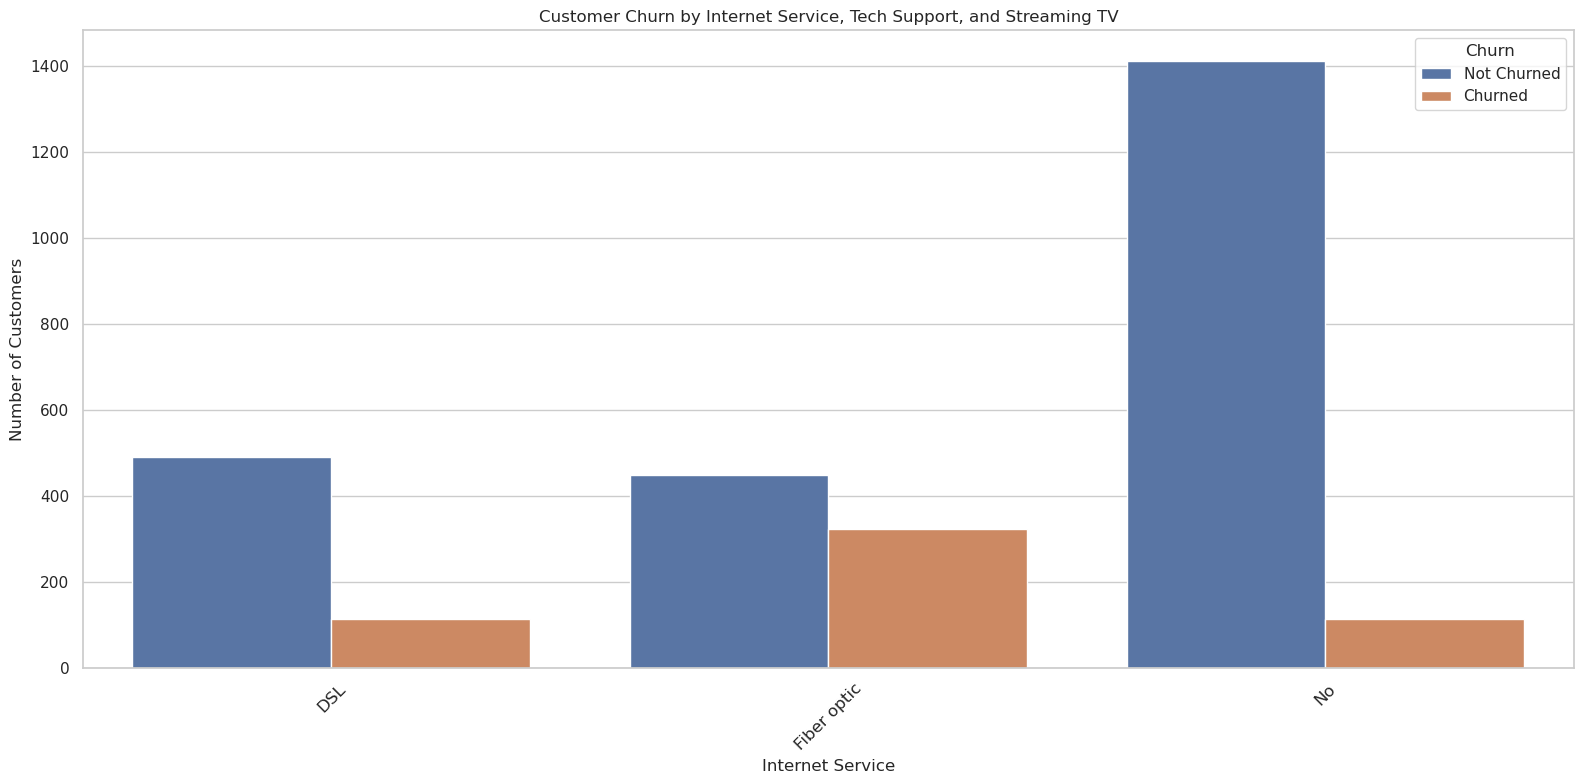

In [490]:
# do customers who use more services have a lower churn rate

query_5 = """
SELECT InternetService, TechSupport, StreamingTV, Churn, COUNT(*) as num_customers
FROM telco_customer_data
GROUP BY InternetService, TechSupport, StreamingTV, Churn;
"""

df_5 = pd.read_sql_query(query_5, conn)
print(df_5)

print("Query 5")
plt.figure(figsize=(16, 8))
sns.barplot(
    data=df_5, 
    x="InternetService", 
    y="num_customers", 
    hue="Churn", 
    ci=None
)
plt.title("Customer Churn by Internet Service, Tech Support, and Streaming TV")
plt.xlabel("Internet Service")
plt.ylabel("Number of Customers")
plt.legend(title="Churn", labels=["Not Churned", "Churned"])
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

   PaperlessBilling  Churn  num_customers
0                 0      0           2403
1                 0      1            469
2                 1      0           2771
3                 1      1           1400
Query 6


/tmp/ipykernel_2376857/2191886399.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


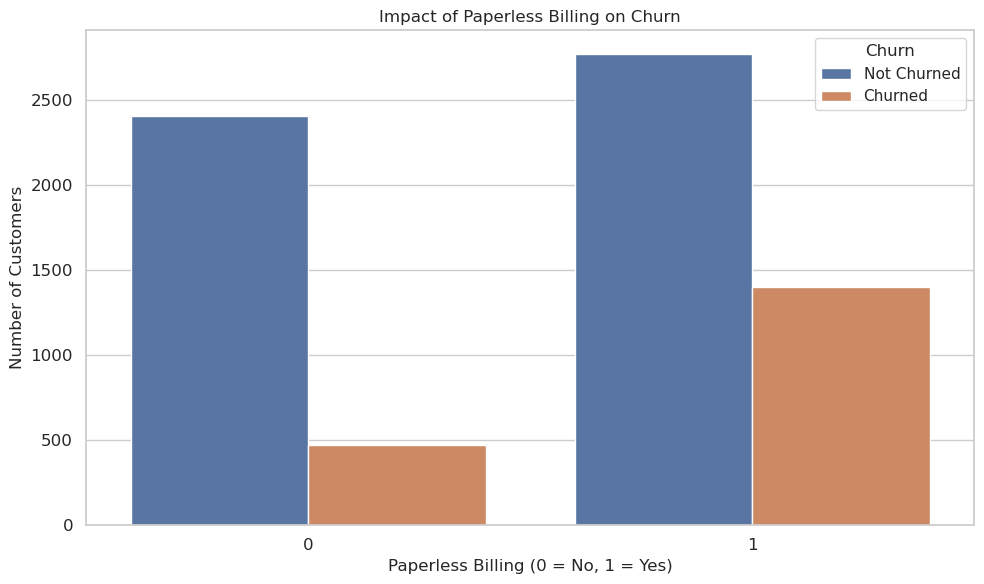

In [491]:
# do customers who use paperless billing have a higher retention rate

query_6 = """
SELECT PaperlessBilling, Churn, COUNT(*) as num_customers
FROM telco_customer_data
GROUP BY PaperlessBilling, Churn;
"""

df_6 = pd.read_sql_query(query_6, conn)
print(df_6)

print("Query 6")
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_6, 
    x="PaperlessBilling", 
    y="num_customers", 
    hue="Churn", 
    ci=None
)

plt.title("Impact of Paperless Billing on Churn")
plt.xlabel("Paperless Billing (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.legend(title="Churn", labels=["Not Churned", "Churned"])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# what are the key factors contributing to customer churn

query_7 = """
SELECT Contract, PaymentMethod, Churn, COUNT(*) as num_customers
FROM telco_customer_data
GROUP BY Contract, PaymentMethod, Churn;
"""

df_7 = pd.read_sql_query(query_7, conn)
print(df_7)

print("Query 7")
pivot_df = df_7.pivot_table(
    index=["Contract", "PaymentMethod"], 
    columns="Churn", 
    values="num_customers", 
    aggfunc="sum"
).fillna(0)

pivot_df.plot(
    kind="bar", 
    stacked=True, 
    figsize=(12, 8), 
    color=["skyblue", "salmon"], 
    alpha=0.85
)

plt.title("Impact of Contract and Payment Method on Churn")
plt.xlabel("Contract and Payment Method")
plt.ylabel("Number of Customers")
plt.legend(["Not Churned", "Churned"], title="Churn")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
# how does the length of the customer relationship (tenure) correlate with churn

query_8 = """
SELECT tenure, Churn, COUNT(*) as num_customers
FROM telco_customer_data
GROUP BY tenure, Churn
ORDER BY tenure;
"""

df_8 = pd.read_sql_query(query_8, conn)
print(df_8)

print("Query 8")
pivot_df = df_8.pivot_table(
    index="tenure", 
    columns="Churn", 
    values="num_customers", 
    aggfunc="sum"
).fillna(0)

plt.figure(figsize=(12, 6))
plt.plot(pivot_df.index, pivot_df[0], label="Not Churned", color="green", marker="o", alpha=0.75)
plt.plot(pivot_df.index, pivot_df[1], label="Churned", color="red", marker="o", alpha=0.75)

plt.title("Correlation Between Tenure and Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

         Contract  Churn  num_customers
0  Month-to-month      0           2220
1  Month-to-month      1           1655
2        One year      0           1307
3        One year      1            166
4        Two year      0           1647
5        Two year      1             48
Query 9


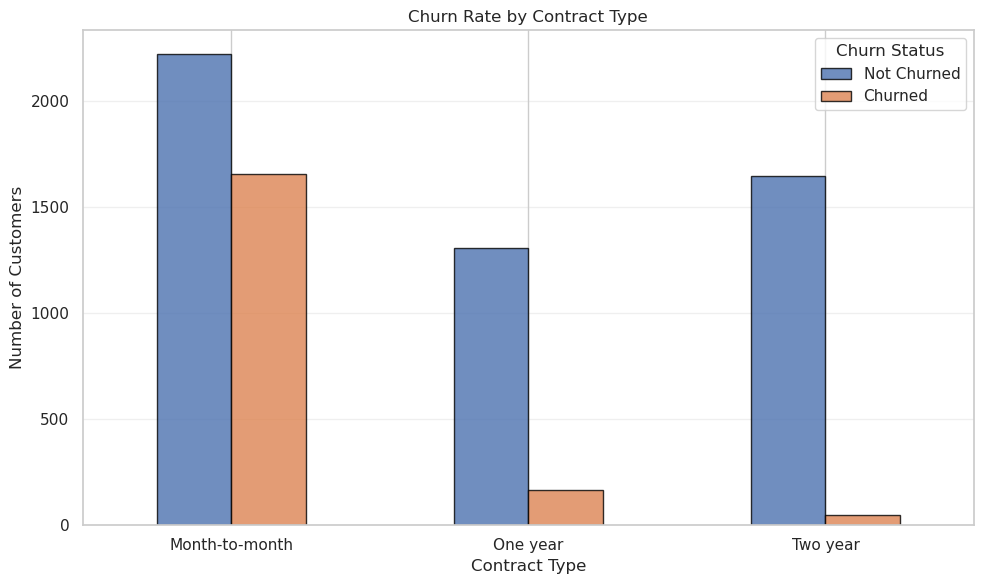

In [494]:
# are customers with contract types that lock them in less likely to churn

query_9 = """
SELECT Contract, Churn, COUNT(*) as num_customers
FROM telco_customer_data
GROUP BY Contract, Churn;
"""

df_9 = pd.read_sql_query(query_9, conn)
print(df_9)

print("Query 9")
pivot_df = df_9.pivot_table(
    index="Contract", 
    columns="Churn", 
    values="num_customers", 
    aggfunc="sum"
).fillna(0)

pivot_df.plot(
    kind="bar", 
    figsize=(10, 6), 
    alpha=0.8, 
    edgecolor="black"
)

plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0, fontsize=11)
plt.legend(["Not Churned", "Churned"], title="Churn Status")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

In [495]:
# is there a correlation between the type of internet service and customer churn

query_10 = """
SELECT InternetService, Churn, COUNT(*) as num_customers
FROM telco_customer_data
GROUP BY InternetService, Churn;
"""

df_10 = pd.read_sql_query(query_10, conn)
print(df_10)

  InternetService  Churn  num_customers
0             DSL      0           1962
1             DSL      1            459
2     Fiber optic      0           1799
3     Fiber optic      1           1297
4              No      0           1413
5              No      1            113


In [496]:
# how does churn differ between customers with and without internet service

query_11 = """
SELECT InternetService, Churn, COUNT(*) as num_customers
FROM telco_customer_data
GROUP BY InternetService, Churn;
"""

df_11 = pd.read_sql_query(query_11, conn)
print(df_11)

  InternetService  Churn  num_customers
0             DSL      0           1962
1             DSL      1            459
2     Fiber optic      0           1799
3     Fiber optic      1           1297
4              No      0           1413
5              No      1            113


        Service_Type  Churn  num_customers
0  Multiple Services      0           5174
1  Multiple Services      1           1869
Query 12


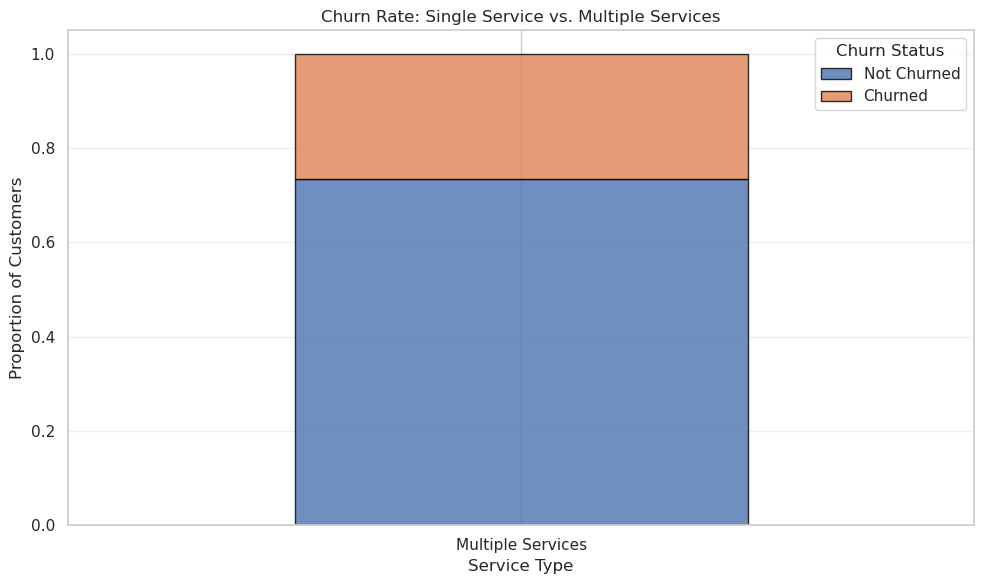

In [497]:
# what is the churn rate for customers who have only one service versus those who have multiple services

query_12 = """
SELECT 
    CASE 
        WHEN InternetService IS NOT NULL AND TechSupport IS NOT NULL THEN 'Multiple Services'
        ELSE 'Single Service'
    END AS Service_Type,
    Churn,
    COUNT(*) as num_customers
FROM telco_customer_data
GROUP BY Service_Type, Churn;
"""

df_12 = pd.read_sql_query(query_12, conn)
print(df_12)

print("Query 12")
pivot_df = df_12.pivot_table(
    index="Service_Type", 
    columns="Churn", 
    values="num_customers", 
    aggfunc="sum"
).fillna(0)

pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0)
pivot_df_percentage.plot(
    kind="bar", 
    stacked=True, 
    figsize=(10, 6), 
    alpha=0.8, 
    edgecolor="black"
)

plt.title("Churn Rate: Single Service vs. Multiple Services")
plt.xlabel("Service Type")
plt.ylabel("Proportion of Customers")
plt.xticks(rotation=0, fontsize=11)
plt.legend(["Not Churned", "Churned"], title="Churn Status")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

     Service_Type  Churn  num_customers
0  Three Services      0           5174
1  Three Services      1           1869
Query 13


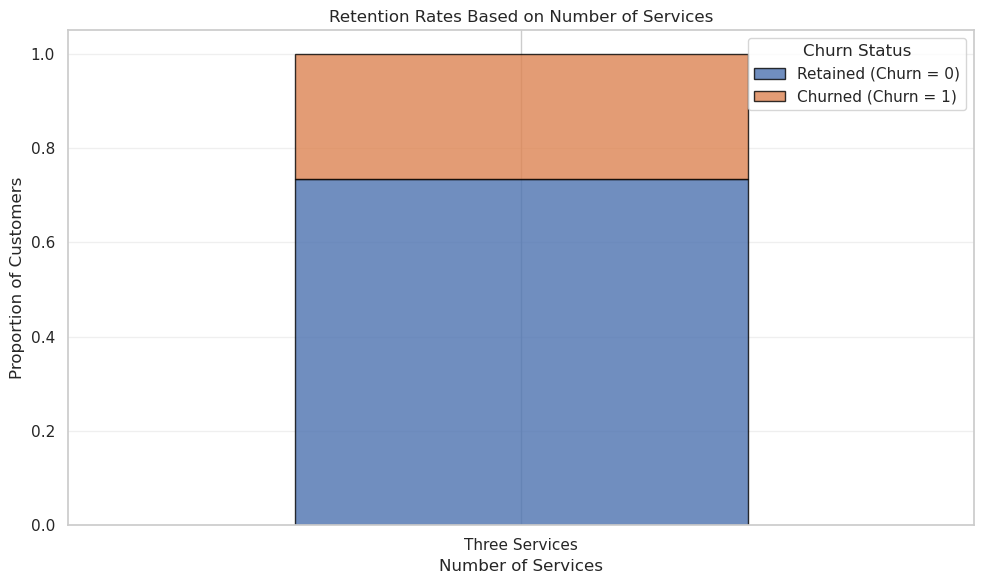

In [498]:
# what are the retention rates based on the number of services a customer subscribes to

query_13 = """
SELECT 
    CASE 
        WHEN InternetService IS NOT NULL AND TechSupport IS NOT NULL AND StreamingTV IS NOT NULL THEN 'Three Services'
        WHEN InternetService IS NOT NULL AND TechSupport IS NOT NULL THEN 'Two Services'
        WHEN InternetService IS NOT NULL THEN 'One Service'
        ELSE 'No Service'
    END AS Service_Type,
    Churn,
    COUNT(*) as num_customers
FROM telco_customer_data
GROUP BY Service_Type, Churn;
"""

df_13 = pd.read_sql_query(query_13, conn)
print(df_13)

print("Query 13")
pivot_df = df_13.pivot_table(
    index="Service_Type", 
    columns="Churn", 
    values="num_customers", 
    aggfunc="sum"
).fillna(0)

pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0)
pivot_df_percentage.plot(
    kind="bar", 
    stacked=True, 
    figsize=(10, 6), 
    alpha=0.8, 
    edgecolor="black"
)

plt.title("Retention Rates Based on Number of Services")
plt.xlabel("Number of Services")
plt.ylabel("Proportion of Customers")
plt.xticks(rotation=0, fontsize=11)
plt.legend(["Retained (Churn = 0)", "Churned (Churn = 1)"], title="Churn Status")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

In [499]:
# how does customer satisfaction with the service affect retention

query_14 = """
SELECT StreamingTV, Churn, COUNT(*) as num_customers
FROM telco_customer_data
GROUP BY StreamingTV, Churn;
"""

df_14 = pd.read_sql_query(query_14, conn)
print(df_14)

           StreamingTV  Churn  num_customers
0                   No      0           1868
1                   No      1            942
2  No internet service      0           1413
3  No internet service      1            113
4                  Yes      0           1893
5                  Yes      1            814


In [500]:
# what behaviors or attributes can predict early churn

query_15 = """
SELECT tenure, Churn, COUNT(*) as num_customers
FROM telco_customer_data
WHERE tenure < 12
GROUP BY tenure, Churn;
"""

df_15 = pd.read_sql_query(query_15, conn)
print(df_15)

    tenure  Churn  num_customers
0        0      0             11
1        1      0            233
2        1      1            380
3        2      0            115
4        2      1            123
5        3      0            106
6        3      1             94
7        4      0             93
8        4      1             83
9        5      0             69
10       5      1             64
11       6      0             70
12       6      1             40
13       7      0             80
14       7      1             51
15       8      0             81
16       8      1             42
17       9      0             73
18       9      1             46
19      10      0             71
20      10      1             45
21      11      0             68
22      11      1             31


In [501]:
conn.close()

In [502]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)
        print(f"Column type: categorical")
        print("-"*50)
        print("Unique values: ", df[col].unique())
        print("-"*50)
        print("Value counts: ")
        print(df[col].value_counts())
        print("\n")
    else:
        print(col)
        print(f"Column type: numerical")
        print("-"*50)
        print("Summary statistics: ")
        print(df[col].describe())

customerID
Column type: numerical
--------------------------------------------------
Summary statistics: 
count    7043.000000
mean     3521.000000
std      2033.283305
min         0.000000
25%      1760.500000
50%      3521.000000
75%      5281.500000
max      7042.000000
Name: customerID, dtype: float64
gender
Column type: numerical
--------------------------------------------------
Summary statistics: 
count    7043.000000
mean        0.504756
std         0.500013
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64
SeniorCitizen
Column type: numerical
--------------------------------------------------
Summary statistics: 
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64
Partner
Column type: numerical
--------------------------------------------------

---

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---